# Image Compression using Autoencoders on MNIST dataset 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.layers import Dense,Input
from keras.models import Model

In [0]:
input_img=Input(shape=(784,))
encoded=Dense(32, activation='sigmoid')(input_img)
#a=encoded.shape
decoded=Dense(784, activation='sigmoid')(encoded)

In [0]:
autoencoder=Model(input_img, decoded)

In [0]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

In [0]:
from keras.datasets import mnist

In [0]:
(x_train,_),(x_test,_)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [0]:
x_train.shape

(60000, 784)

In [0]:
x_test.shape

(10000, 784)

In [0]:
autoencoder.fit(x_train,x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test,x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 4s 71us/step - loss: 0.4644 - val_loss: 0.3303
Epoch 2/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.3050 - val_loss: 0.2899
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2837 - val_loss: 0.2789
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.2764 - val_loss: 0.2740
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2727 - val_loss: 0.2712
Epoch 6/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2705 - val_loss: 0.2695
Epoch 7/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2691 - val_loss: 0.2683
Epoch 8/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2681 - val_loss: 0.2675
Epoch 9/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.2674 - val_loss: 0.26

In [0]:
encoder=Model(input_img,encoded)
encoded_input=Input(shape=(32,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoded_input,decoder_layer(encoded_input))

In [0]:
encoded_imgs=encoder.predict(x_test)
decoded_imgs=decoder.predict(encoded_imgs)

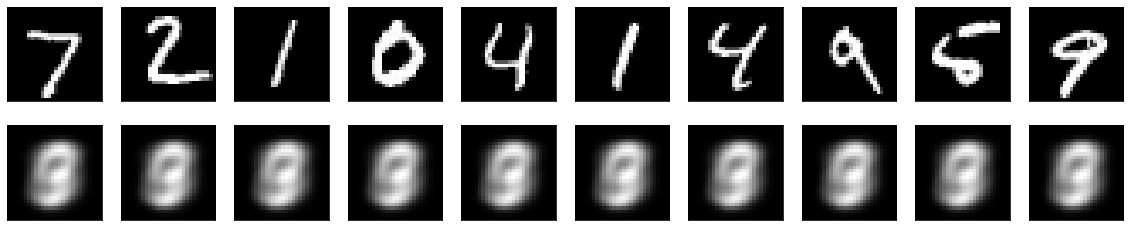

In [0]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
#Deep autoencoder

In [0]:
input_image=Input(shape=(784,))
encoded=Dense(128, activation='relu')(input_image)
encoded=Dense(64, activation='relu')(encoded)
encoded=Dense(32, activation='relu')(encoded)

decoded=Dense(64, activation='relu')(encoded)
decoded=Dense(128, activation='relu')(decoded)
decoded=Dense(784, activation='sigmoid')(decoded)




In [0]:
autoencoder=Model(input_image, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [0]:
autoencoder.fit(x_train,x_train,epochs=100,shuffle=True, batch_size=256, validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.3262 - val_loss: 0.2636
Epoch 2/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2568 - val_loss: 0.2482
Epoch 3/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2378 - val_loss: 0.2280
Epoch 4/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2242 - val_loss: 0.2169
Epoch 5/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2091 - val_loss: 0.1982
Epoch 6/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1938 - val_loss: 0.1871
Epoch 7/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.1874 - val_loss: 0.1849
Epoch 8/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.1832 - val_loss: 0.1800
Epoch 9/100
60000/60000 [==============================] - 5s 84us/step - loss: 1.6528 - val_loss: 0.6

In [0]:
decoded_imgs = autoencoder.predict(x_test)

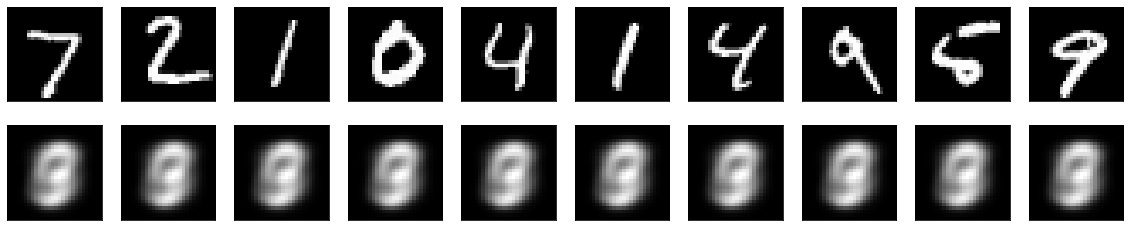

In [0]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
x_train.shape

(60000, 784)